In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    roc_curve,
    roc_auc_score
)


df = pd.read_csv(r"C:\Users\asus\Downloads\diabetes.csv")





In [17]:
print("First 5 rows:")
df.head()

First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

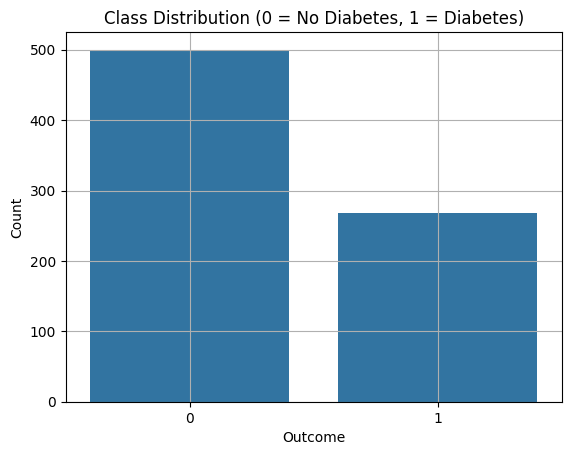

In [20]:
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution (0 = No Diabetes, 1 = Diabetes)')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.grid(True)
plt.show()

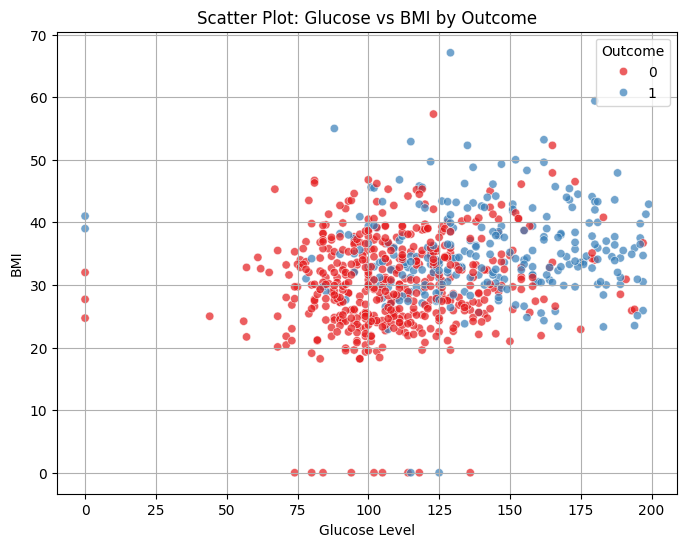

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, palette='Set1', alpha=0.7)
plt.title('Scatter Plot: Glucose vs BMI by Outcome')
plt.xlabel('Glucose Level')
plt.ylabel('BMI')
plt.grid(True)
plt.show()

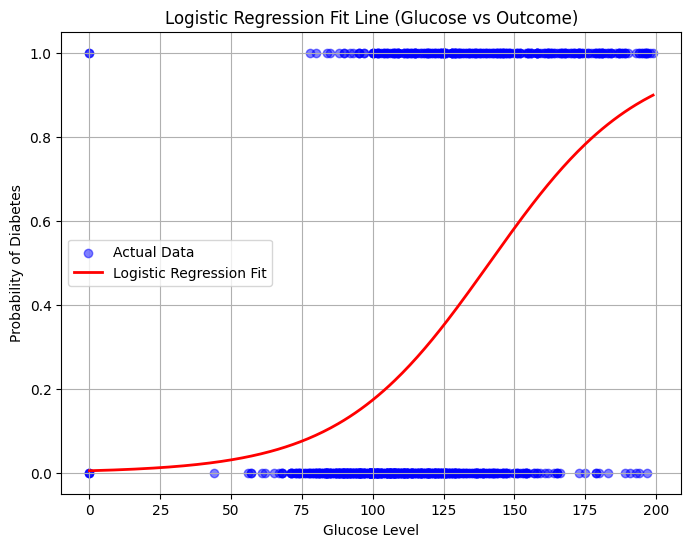

In [27]:
# Logistic Regression Fit for Glucose vs Outcome
X_glucose = df[['Glucose']].values
y_outcome = df['Outcome'].values

log_reg_glucose = LogisticRegression()
log_reg_glucose.fit(X_glucose, y_outcome)

X_range = np.linspace(X_glucose.min(), X_glucose.max(), 300).reshape(-1, 1)
y_prob_glucose = log_reg_glucose.predict_proba(X_range)[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(X_glucose, y_outcome, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_range, y_prob_glucose, color='red', linewidth=2, label='Logistic Regression Fit')
plt.title('Logistic Regression Fit Line (Glucose vs Outcome)')
plt.xlabel('Glucose Level')
plt.ylabel('Probability of Diabetes')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=16
)

In [24]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


C:\Users\asus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


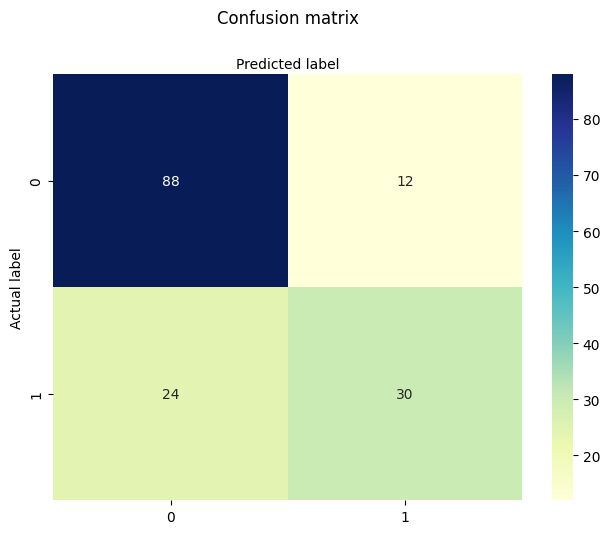

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Make sure these variables exist
# X_train, X_test, y_train, y_test

# Step 1: Train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)  # <-- this line is essential

# Step 2: Predict using the trained model
y_pred = logreg.predict(X_test)

# Step 3: Create confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)

# Step 4: Plot confusion matrix
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.7142857142857143
Recall: 0.5555555555555556
F1 Score: 0.625
